In [1]:
import illustris_python as il
import pickle 
        
with open('../../fiducial/postprocessing/bullet_mergers.pkl', 'rb') as f:
    halo_mergers = pickle.load(f)

In [2]:
for halo in halo_mergers.keys():
    msnaps = halo_mergers[halo]
    if len(msnaps[msnaps > 49]):
        print(halo, msnaps[msnaps > 49])

2830001 [81]
3080782 [91 96]
3817446 [63 64]
5902094 [53 54 57 58 59 66 67 69 94 95]
6737251 [86]
6844091 [51]
6897780 [86]
7469650 [71]
7571778 [76 86 90 94 97]
7929000 [84 85]
8021322 [79 80 81 84 88 93]
8474752 [60 61 62 63 64 65 66]
8622692 [98]
9152984 [75 77]
9249700 [79 80 81 82 83 84 85 86 87 88 90 91 92]
9611401 [58 59]
9664057 [77]
9717216 [79]
10140647 [50 51 52]
10183610 [58 59 60 61 63 64]
10292901 [74 75]
10358644 [50 85 87 88 89 90]


In [3]:
def get_halo_num(subid, snapshot):
    tree2 = il.lhalotree.loadTree(basePath, 99, subid, onlyMPB=True)

    subid = tree2['SubhaloNumber'][tree2['SnapNum'] == snapshot]
    
    hnum = il.groupcat.loadSingle(basePath, snapshot, subhaloID=subid)['SubhaloGrNr']
    return hnum

In [4]:
basePath = '/virgotng/mpia/TNG-Cluster/TNG-Cluster/output/'
hnum = get_halo_num(2830001, 81)

halo = il.snapshot.loadHalo(basePath, 81, id=hnum, partType='gas')

In [5]:
halo.keys()

dict_keys(['count', 'Coordinates', 'Density', 'ElectronAbundance', 'GFM_Metallicity', 'InternalEnergy', 'Masses', 'ParticleIDs', 'StarFormationRate', 'Velocities'])

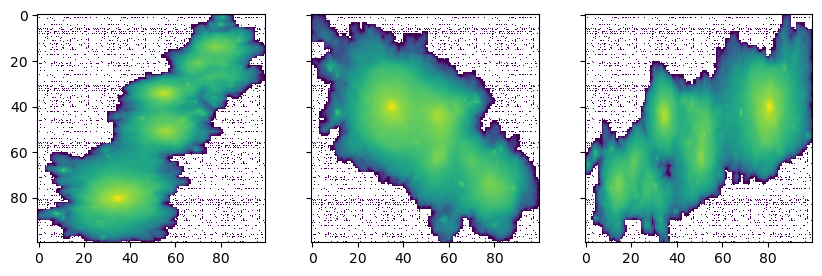

In [11]:
import numpy as np

import matplotlib.pylab as plt
from matplotlib import colors, cm

fig, ax = plt.subplots(ncols = 3, sharey=True, figsize=(10,3))
axes = [0, 1, 2]

for i in range(3):
    a1, a2 = [a for a in axes if a != i]
    hist = np.histogram2d(halo['Coordinates'][:,a1], halo['Coordinates'][:,a2], bins=100)
    ax[i].imshow(hist[0], norm=colors.LogNorm())
